In [1]:
import pylhe
import ROOT
import math
import os
import pandas as pd
import uproot
import numpy as np
import matplotlib.pyplot as plt
import xlrd


Welcome to JupyROOT 6.20/04


In [3]:
def file_np(file):
    event = [ file["Delphes;1"]["Electron"].array(),
              file["Delphes;1"]["Electron.PT"].array(),
              file["Delphes;1"]["Electron.Eta"].array(),
              file["Delphes;1"]["Electron.Phi"].array(),
              file["Delphes;1"]["Muon"].array(),                #4
              file["Delphes;1"]["Muon.PT"].array(),
              file["Delphes;1"]["Muon.Eta"].array(),
              file["Delphes;1"]["Muon.Phi"].array(),
              file["Delphes;1"]["Photon"].array(),              #8
              file["Delphes;1"]["Photon.PT"].array(),
              file["Delphes;1"]["Photon.Eta"].array(),
              file["Delphes;1"]["Photon.Phi"].array(),
              file["Delphes;1"]["MissingET"].array(),           #12
              file["Delphes;1"]["MissingET.fUniqueID"].array(),   
              file["Delphes;1"]["MissingET.fBits"].array(),
              file["Delphes;1"]["MissingET.MET"].array(),
              file["Delphes;1"]["MissingET.Eta"].array(),
              file["Delphes;1"]["MissingET.Phi"].array(),
              file["Delphes;1"]["Jet"].array(),                 #18
              file["Delphes;1"]["Jet.EhadOverEem"].array(),     
              file["Delphes;1"]["Jet.Mass"].array(),
              file["Delphes;1"]["Event.Number"].array(),
              file["Delphes;1"]["Jet.Tau[5]"].array(),
              file["Delphes;1"]["Event.CrossSection"].array()
              ]
    
    event = np.expand_dims(event, axis=-1)    ### reshape data
    event = event.transpose((1,0,2))
    event = np.squeeze(event,axis=(2,))
    return event 

File for m_ax=90:
1.000000e+00   2    22   22   #

File for m_ax=91:
1.000000e+00   2    22   22   #

File for m_ax=92:
9.999987e-01   2    22   22   #
1.279200e-06   2    22   23   #

File for m_ax=93:
9.999865e-01   2    22   22   #
1.353031e-05   2    22   23   #

File for m_ax=94:
9.999518e-01   2    22   22   #
4.818888e-05   2    22   23   #

File for m_ax=95:
9.998855e-01   2    22   22   #
1.144786e-04   2    22   23   #

File for m_ax=96:
9.997803e-01   2    22   22   #
2.197159e-04   2    22   23   #

File for m_ax=97:
9.996304e-01   2    22   22   #
3.695868e-04   2    22   23   #

File for m_ax=98:
9.994316e-01   2    22   22   #
5.683854e-04   2    22   23   #

File for m_ax=99:
9.991808e-01   2    22   22   #
8.192205e-04   2    22   23   #

File for m_ax=100:
9.988758e-01   2    22   22   #
1.124194e-03   2    22   23   #



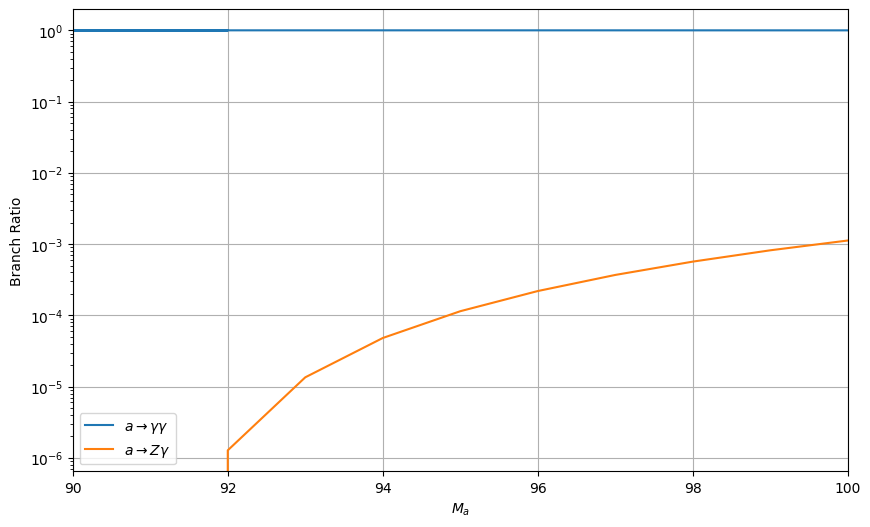

In [26]:
import re

def extract_lines_between_tags(file_path, start_tag, end_tag):
    with open(file_path, 'r') as file:
        content = file.read()
        pattern = re.compile(f'{re.escape(start_tag)}(.*?){re.escape(end_tag)}', re.DOTALL)
        match = pattern.search(content)
        if match:
            return match.group(1).strip().split('\n')
        else:
            return []


m_axlist = [90 + i for i in range(11)]


sg_events = {}


for i, m_ax in enumerate(m_axlist, start=1):
    run_number = f"{i:02d}"
    sg_file_path = f"/data/event/sg_mascan_90_100/Events/run_{run_number}/run_{run_number}_tag_1_banner.txt"
    extracted_lines = extract_lines_between_tags(sg_file_path, '#  BR             NDA  ID1    ID2   ...', '</slha>')
    sg_events[m_ax] = extracted_lines


for m_ax, lines in sg_events.items():
    print(f"File for m_ax={m_ax}:")
    for line in lines:
        columns = line.split()
        formatted_line = f"{columns[0]:<15}{columns[1]:<5}{columns[2]:<5}{columns[3]:<5}{columns[4]:<}"
        print(formatted_line)
    print()
    
data_22_22 = [(i, 1.0) for i in range(93)]
data_22_23 = [(i, 0.0) for i in range(93)]

# 分类数据并覆盖范围内的数据
for m_ax, lines in sg_events.items():
    for line in lines:
        columns = line.split()
        if len(columns) >= 5:
            br_value = float(columns[0])
            id1 = int(columns[2])
            id2 = int(columns[3])
            if id1 == 22 and id2 == 22:
                data_22_22.append((m_ax, br_value))
            elif id1 == 22 and id2 == 23:
                data_22_23.append((m_ax, br_value))

# 提取m_ax和BR值用于绘图
m_ax_22_22, br_22_22 = zip(*data_22_22)
m_ax_22_23, br_22_23 = zip(*data_22_23)

# 绘制图表
plt.figure(figsize=(10, 6))

plt.plot(m_ax_22_22, br_22_22 , label=r"$a \rightarrow \gamma \gamma$")
plt.plot(m_ax_22_23, br_22_23 , label=r"$a \rightarrow Z \gamma$")

plt.xlabel(r"$M_a$")
plt.ylabel('Branch Ratio')
# plt.title('BR values for different IDs')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.xlim(90,100)
plt.show()

